# **Interesting insights about 'Shark Tank India' season 1, 2, 3**

1. *Changes and Developments Over Three Seasons*
2. *Common reasons for getting offer*
3. *Strategies Used by Sharks*
4. *Trends in Business Ideas*<br><br>and many more ...

In [24]:
# Importing required libraries

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
# clean_file_path = "C:/Users/anirudh.bhadauria/data-analytics/shark-tank-analysis/data/shark_tank_clean.csv"
clean_file_path = "data/shark_tank_clean.csv"

In [26]:
# Loading the raw csv file
tank_df = pd.read_csv(clean_file_path, parse_dates = True)

#### What is the total number of episodes (aired) and entrepreneur that came in total and each season seperately?


In [27]:
# General statistics

def total_entrepreneurs_season(season_number):
    return tank_df['presenter_count'].loc[
        tank_df['season_number'] == season_number
    ].sum()
    
total_entrepreneurs = tank_df['presenter_count'].sum()
total_episodes = tank_df.loc[
    tank_df['episode_number'] != 0
]

print(f'Total number of aired episodes: {total_episodes.shape[0]}')
print(f"Total number of entrepreneurs that appeared in Sharktank so far: {total_entrepreneurs}")

Total number of aired episodes: 447
Total number of entrepreneurs that appeared in Sharktank so far: 966


In [28]:
# Plot for number of startups and entreprenuers 

startups_season_one = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[0, 0]
startups_season_two = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[1, 0]
startups_season_three = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[2, 0]

labels_entre = ["Entrepreneurs Season 1", "Entrepreneurs Season 2", "Entrepreneurs Season 3"]
values_entre = [
    total_entrepreneurs_season(1),
    total_entrepreneurs_season(2),
    total_entrepreneurs_season(3)
]

labels_startup = ['Startups in season 1', 'Startups in season 2', 'Startups in season 3']
values_startup = [startups_season_one, startups_season_two, startups_season_three]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}]]
)

fig.add_trace(
    go.Pie(labels=labels_entre, values=values_entre, hole=.45, textinfo='value'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=labels_startup, values=values_startup, hole=.45, textinfo='value'),
    row=1, col=2
)

fig.update_layout(
    font=dict(size=16),
    width=1000,
    height=450,
    margin=dict(l=40, r=40, t=30, b=10),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=True,
    legend=dict(orientation="v", yanchor="bottom", y=0.6, xanchor="right", x=1.5),
    annotations=[
        dict(
            text="Total Entrepreneurs per Season",
            x=0,
            y=1,
            xref="paper",
            yref="paper",
            showarrow=False
        ),
        dict(
            text="Total Startups per Season",
            x=0.95,
            y=1,
            xref="paper",
            yref="paper",
            showarrow=False
        )
    ]
)

fig.show()

#### Compute the percentage of startups getting offers?

In [29]:
# Percentage of offers 
def percentage_offers(season_number):
    total_offers_received = tank_df['received_offer'].loc[
        tank_df['season_number'] == season_number
    ].sum()
    
    total_startups = tank_df['startup_name'].loc[
        tank_df['season_number'] == season_number
    ].shape[0]

    return ((total_offers_received / total_startups) * 100).round(2)

total_offers_received = tank_df['received_offer'].sum()
total_startups = tank_df['startup_name'].shape[0]

offers = ((total_offers_received / total_startups) * 100).round(2)

print(f"Total Number of offers received: {total_offers_received}")
print(f"Total Number of pitches: {total_startups}")
print()
print(f"Percentage of Startups getting offer: {offers}%")
print()
print(f"Percentage of Startups getting offer in season 1: {percentage_offers(1)}%")
print(f"Percentage of Startups getting offer in season 2: {percentage_offers(2)}%")
print(f"Percentage of Startups getting offer in season 3: {percentage_offers(3)}%")

Total Number of offers received: 321
Total Number of pitches: 478

Percentage of Startups getting offer: 67.15%

Percentage of Startups getting offer in season 1: 63.16%
Percentage of Startups getting offer in season 2: 71.6%
Percentage of Startups getting offer in season 3: 66.24%


#### Top five Industries that got offers in all Shark tank India seasons

In [64]:
startup_deals = tank_df.loc[
    tank_df['received_offer'] == 1
]

startup_deals['Total startups'] = tank_df[['industry', 'startup_name']].groupby('industry').count().rename(
    columns = {
        "startup_name": "Total startups"
    }
)

startup_deals['Got Offer'] = tank_df.loc[
    tank_df['received_offer'] == 1,
    ['industry', 'startup_name']
].groupby('industry').count().rename(
    columns = {
        "startup_name": "Got Offer"
    }
)

startup_deals['Got Offer (%)'] = ((startup_deals['Got Offer'] / startup_deals['Total startups']) * 100).round(2)
startup_deals.sort_values('Got Offer', ascending=False).iloc[:5, :].sort_values('Got Offer (%)', ascending=False)

C:\Users\aniru\AppData\Local\Temp\ipykernel_11096\1187551681.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aniru\AppData\Local\Temp\ipykernel_11096\1187551681.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aniru\AppData\Local\Temp\ipykernel_11096\1187551681.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,season_number,startup_name,episode_number,pitch_number,air_date,industry,busniess_description,year_founded,presenter_count,male_presenter,...,peyush_present,amit_present,ashneer_present,guest_present,multiple_pitcher_cities,multiple_guests,multiple_guest_investments,Total startups,Got Offer,Got Offer (%)
0,1,BluePineFoods,1,1,2021-12-20 00:00:00,Food,Frozen Momos,2016.0,3,2.0,...,0.0,0.0,1.0,0.0,0,0,0,NaN,NaN,NaN
1,1,BoozScooters,1,2,2021-12-20 00:00:00,Automobile,Renting e-bike for mobility in private spaces,2017.0,1,1.0,...,0.0,0.0,1.0,0.0,0,0,0,NaN,NaN,NaN
2,1,HeartUpMySleeves,1,3,2021-12-20 00:00:00,Fashion,Detachable Sleeves,2021.0,1,0.0,...,0.0,0.0,1.0,0.0,0,0,0,NaN,NaN,NaN
3,1,TagzFoods,2,4,2021-12-21 00:00:00,Food,Healthy Potato Chips Snacks,2019.0,2,2.0,...,0.0,0.0,1.0,0.0,0,0,0,NaN,NaN,NaN
6,1,qZenseLabs,3,7,2021-12-22 00:00:00,Food,Food Freshness Detector,2020.0,2,0.0,...,0.0,0.0,1.0,0.0,1,0,0,NaN,NaN,NaN


In [ ]:
# Conclusion!

print("""Conclusion: 

A statrup in Healthcare, Food, Technology, Fashion, Manufacturing is more likely to get an offer""")

In [65]:
# Total number of startups from different industries for a particular season

def startup_offer_converted_by_season(season):
    season_startup_industry = tank_df.loc[
        tank_df['season_number'] == season
    ][['industry', 'startup_name']].groupby('industry').count().rename(
        columns = {
            "startup_name": "Startups"
        }
    )
    
    season_startup_received_offer = tank_df.loc[
        tank_df['season_number'] == season
    ][['industry', 'startup_name']].loc[
        tank_df['received_offer'] == 1
    ].groupby('industry').count().rename(columns = {
        "startup_name": "Got Offer"
    })
    
    season_startup_deal = tank_df.loc[
        tank_df['season_number'] == season
    ][['industry', 'startup_name']].loc[
        tank_df['deal_amount'] != 0
    ].groupby('industry').count().rename(columns = {
        "startup_name": "Deals"
    })
    
    season_startup_offer = pd.merge(
        season_startup_industry, 
        season_startup_received_offer, 
        on="industry", how='left'
    )
    season_startup_deals = pd.merge(
        season_startup_offer, 
        season_startup_deal, 
        on="industry", how="left"
    )
    
    season_startup_deals['Got Offer (%)'] = (
        (season_startup_deals['Got Offer'] / season_startup_deals['Startups']) * 100
    ).round(2)
    season_startup_deals['Offers converted (%)'] = (
        (season_startup_deals['Deals'] / season_startup_deals['Got Offer']) * 100
    ).round(2)
    
    season_startup_deals.fillna(0, inplace=True)
    return season_startup_deals

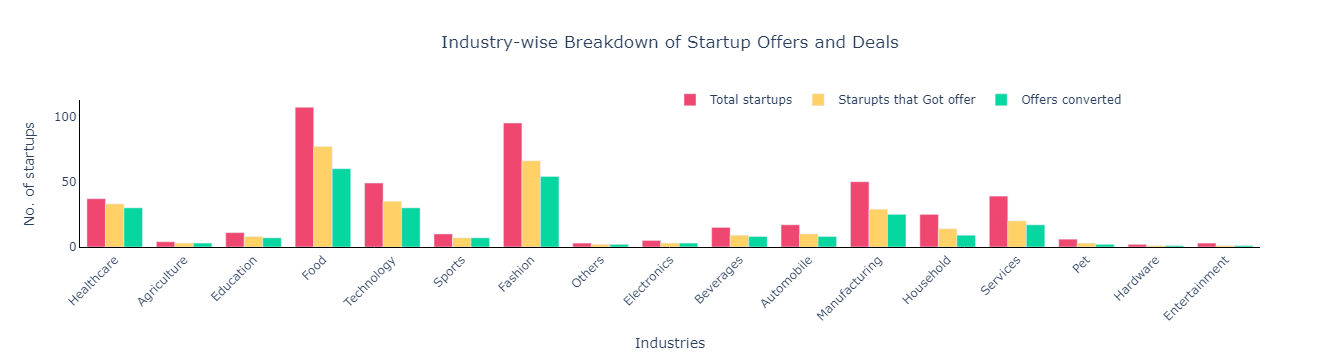

In [66]:
# Plot for total number of startups from different industries for a particular season 

def plot_startup_offer(season_number):
    startup_data = startup_offer_converted_by_season(season_number)
    
    industry = startup_data.index
    startups = startup_data.values[:, 0]
    offers = startup_data.values[:, 1]
    deals = startup_data.values[:, 2]
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=industry,
        y=startups,
        name='Startups',
        marker_color='#5e548e'
    ))
    
    fig.add_trace(go.Bar(
        x=industry,
        y=offers,
        name='Total offers',
        marker_color='#9f86c0'
    ))
    
    fig.add_trace(go.Bar(
        x=industry,
        y=deals,
        name='Total deals',
        marker_color='#be95c4'
    ))
    
    fig.update_layout(
        barmode='group', 
        xaxis_tickangle=-45, 
        title=f"Industry-wise Breakdown of Startup Offers and Deals for season {season_number}",
        height=350,
        margin=dict(l=40, r=40, t=60, b=40),
        plot_bgcolor='white',  
        paper_bgcolor='white', 
        xaxis=dict(
            showline=True,
            linewidth=1,
            linecolor='black',
            autorange=True,
            title='Industries',
        ),
        yaxis=dict(
            showline=True,
            linewidth=1,
            linecolor='black',
            autorange=True,
            title='No. of startups',
        )
    )
    
fig.show()

#### Total number of startups from different industries with offer received rate and offers conversion rate

In [61]:
# Grouping industries

startup_industry = tank_df[['industry', 'startup_name']].groupby('industry').count().rename(
    columns = {
        "startup_name": "Number of Startups"
    }
)

offer_industry = tank_df[['industry', 'startup_name']].loc[
    tank_df['received_offer'] == 1
].groupby('industry').count().rename(
    columns = {
        "startup_name": "Offers"
    }
)

deal_offer_industry = tank_df[['industry', 'startup_name']].loc[
    tank_df['deal_amount'] > 0
].groupby('industry').count().rename(
    columns = {
        "startup_name": "Deals"
    }
)

offer_result = pd.merge(startup_industry, offer_industry, on='industry', how="left")
result = pd.merge(offer_result, deal_offer_industry, on="industry", how="left")

result['Offers (%)'] = ((result['Offers'] / result['Number of Startups']) * 100).round(2)
result['Offers converted (%)'] = ((result['Deals'] / result['Offers']) * 100).round(2)

offers_industries = result.sort_values('Offers (%)', ascending=False)
offers_industries

,Number of Startups,Offers,Deals,Offers (%),Offers converted (%)
industry,,,,,
Healthcare,37,33,30,89.19,90.91
Agriculture,4,3,3,75.00,100.00
Education,11,8,7,72.73,87.50
Food,107,77,60,71.96,77.92
Technology,49,35,30,71.43,85.71
Sports,10,7,7,70.00,100.00
Fashion,95,66,54,69.47,81.82
Others,3,2,2,66.67,100.00
Electronics,5,3,3,60.00,100.00


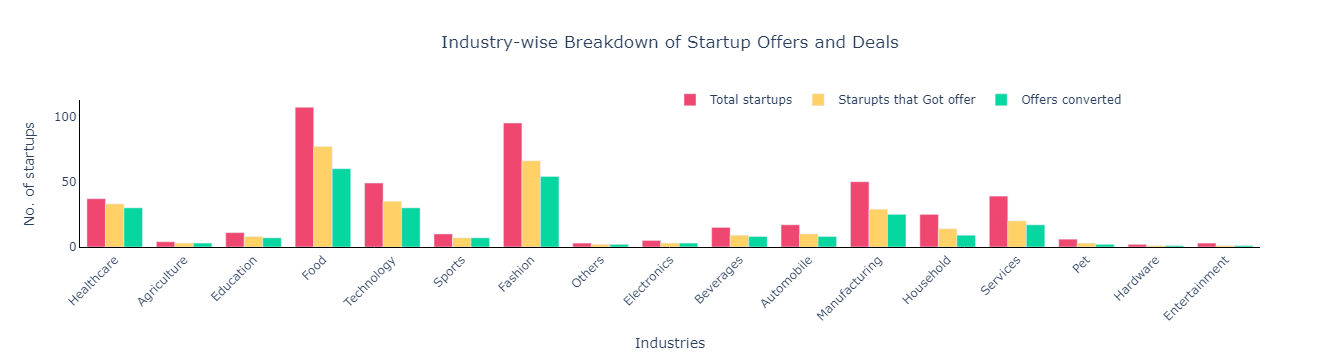

In [62]:
# Plotting industries, offfers, deals

industries = offers_industries.index
startups = offers_industries.iloc[:, 0].values.tolist()
offers = offers_industries.iloc[:, 1].values.tolist()
deals = offers_industries.iloc[:, 2].values.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=industries,
    y=startups,
    name='Total startups',
    marker_color='#ef476f'
))
fig.add_trace(go.Bar(
    x=industries,
    y=offers,
    name='Starupts that Got offer',
    marker_color='#ffd166'
))
fig.add_trace(go.Bar(
    x=industries,
    y=deals,
    name='Offers converted',
    marker_color='#06d6a0'
))

fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    plot_bgcolor='white',  
    paper_bgcolor='white', 
    title={
        'text': 'Industry-wise Breakdown of Startup Offers and Deals',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Industries',
        showline=True,
        linewidth=1,
        linecolor='black',
        tickfont=dict(size=12),
        autorange=True
    ),
    yaxis=dict(
        title='No. of startups',
        showline=True,
        linewidth=1,
        linecolor='black',
        autorange=True
    ),
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h'
    )
)

fig.show()

#### Industry wise break-down of startups, offers and deals for a particular season

In [67]:
# Here 1, 2, 3 are the seasons

plot_startup_offer(1)
# plot_startup_offer(2)
# plot_startup_offer(3)

#### What is the average Yearly revenue and Monthly revenue of startups that got offer?

In [31]:
yearly_revenue = tank_df.loc[
    tank_df['received_offer'] == 1
]['yearly_revenue'].mean().round(2)

monthly_sales = tank_df.loc[
    tank_df['received_offer'] == 1
]['monthly_sales'].mean().round(2)

print(f'Average Yearly revenue of startups that got offer: {yearly_revenue} lakhs')
print(f'Average Montly revenue of startups that got offer: {monthly_sales} lakhs')

Average Yearly revenue of startups that got offer: 324.82 lakhs
Average Montly revenue of startups that got offer: 37.26 lakhs


In [32]:
# Yearly / monthly revenue

yearly_revenue = tank_df.loc[
    tank_df['received_offer'] == 1
]['yearly_revenue'].round(2).tolist()

monthly_revenue = tank_df.loc[
    tank_df['received_offer'] == 1
]['monthly_sales'].round(2).tolist()

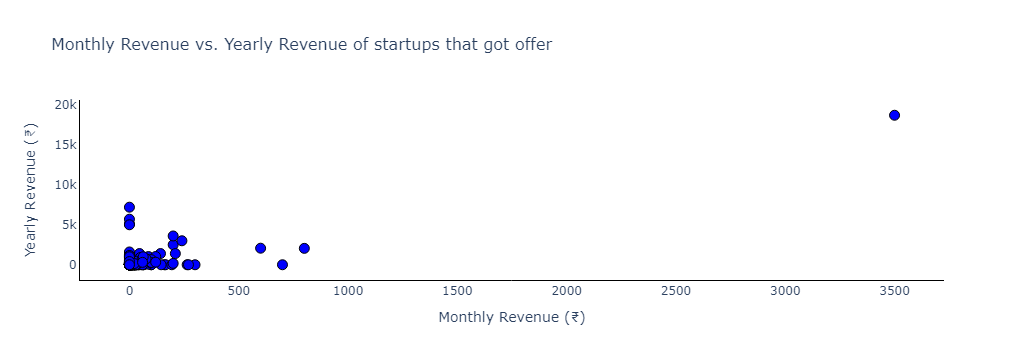

In [33]:
# Plot monthly vs yearly revenue

data = {
    'yearly_revenue': yearly_revenue,
    'monthly_sales': monthly_revenue
}
plot_df = pd.DataFrame(data)

# Prepare data for plotting
yearly_revenue = plot_df['yearly_revenue'].round(2)
monthly_revenue = plot_df['monthly_sales'].round(2)

fig = go.Figure()

# Add trace for monthly revenue
fig.add_trace(go.Scatter(
    x=plot_df['monthly_sales'],
    y=plot_df['yearly_revenue'],
    mode='markers',
    marker=dict(
        color='blue',
        size=10,
        symbol='circle',
        line=dict(width=1, color='black')
    ),
    name='Monthly Revenue'
))

# Update layout for better readability
fig.update_layout(
    title='Monthly Revenue vs. Yearly Revenue of startups that got offer',
    xaxis_title='Monthly Revenue (₹)',
    yaxis_title='Yearly Revenue (₹)',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    legend=dict(
        x=0.1,
        y=1.1,
        orientation='h'
    ),
    title_font_size=16
)

fig.show()

#### What is the average yearly revenue and monthly sales for startups in different industries?

In [39]:
monthly_yearly_result = tank_df[[
    'industry', 'yearly_revenue', 'monthly_sales'
]].groupby('industry').mean().round(2).rename(
    columns = {
        "yearly_revenue": "Yearly Revenue",
        "monthly_sales": "Monthly Sales"
    }
)

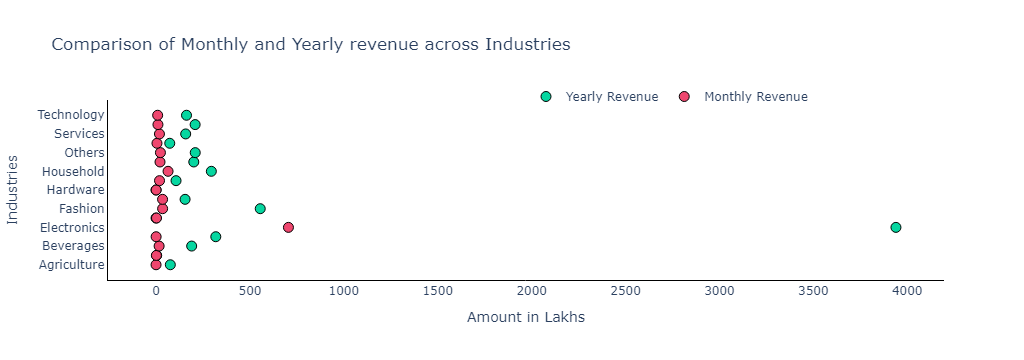

In [41]:
# Plot for monthly and yearly revenue per industry 

data = {
    'Industry': monthly_yearly_result.index.tolist(),
    'yearly_revenue': monthly_yearly_result['Yearly Revenue'].tolist(),
    'monthly_revenue': monthly_yearly_result['Monthly Sales'].tolist()
}
df = pd.DataFrame(data)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['yearly_revenue'],
    y=df['Industry'],
    mode='markers',
    marker=dict(
        color='#06d6a0',
        size=10,
        line=dict(width=1, color='black')
    ),
    name='Yearly Revenue'
))

# Add trace for Metric2
fig.add_trace(go.Scatter(
    x=df['monthly_revenue'],
    y=df['Industry'],
    mode='markers',
    marker=dict(
        color='#ef476f',
        size=10,
        line=dict(width=1, color='black')
    ),
    name='Monthly Revenue'
))

fig.update_layout(
    title='Comparison of Monthly and Yearly revenue across Industries',
    plot_bgcolor='white', 
    paper_bgcolor='white',
    xaxis=dict(
        title='Amount in Lakhs',
        showline=True,
        linewidth=1,
        linecolor='black',
        tickfont=dict(size=12),
        autorange=True
    ),
    yaxis=dict(
        title='Industries',
        showline=True,
        linewidth=1,
        linecolor='black',
        autorange=True
    ),
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h'
    )
)

fig.show()

#### What is the percentage of startups getting offers from different Sharks?

In [34]:
# Computing guest sharks

guest_shark_container = []

def seperate_guest_values(value):
    for guest in value.split(","):
        if guest not in guest_shark_container:
            guest_shark_container.append(guest)
    
guest_names = tank_df['all_guest_names'].loc[
    (~tank_df['all_guest_names'].isna()) &
    (tank_df['all_guest_names'].str.contains(",")) |
    (tank_df['all_guest_names']),
].apply(seperate_guest_values)

In [35]:
guest_labels = []
guest_values = []

for name in guest_shark_container:
    guest_present = tank_df.loc[
        (tank_df['guest_present'] > 0) &
        (~tank_df['all_guest_names'].isna()) &
        (tank_df['all_guest_names'].str.contains(name))
    ].shape[0]
    
    guest_invested = tank_df.loc[
        (tank_df['guest_present'] > 0) &
        (~tank_df['all_guest_names'].isna()) &
        (tank_df['all_guest_names'].str.contains(name)) &
        (tank_df['invested_guest_name'].str.contains(name))
    ].shape[0]
    
    guest_percentage = (guest_invested / guest_present) * 100
    
    guest_values.append(np.round(guest_percentage, decimals=2))
    guest_labels.append(name)

In [36]:
# Computing sharks

def startup_shark_offer(invertment_amount, shark_present):
    return ((tank_df[[invertment_amount]].loc[
        tank_df[invertment_amount] > 0
    ].count() / tank_df[[invertment_amount]].loc[
        tank_df[shark_present] == 1
    ].count()) * 100).round(2).values[0]

aman_offers = startup_shark_offer('aman_investment_amount', 'aman_present')
amit_offers = startup_shark_offer('amit_investment_amount', 'amit_present')
peyush_offers = startup_shark_offer('peyush_investment_amount', 'peyush_present')
namita_offers = startup_shark_offer('namita_investment_amount', 'namita_present')
anupam_offers = startup_shark_offer('anupam_investment_amount', 'anupam_present')
ashneer_offers = startup_shark_offer('ashneer_investment_amount', 'ashneer_present')
vineeta_offers = startup_shark_offer('vineeta_investment_amount', 'vineeta_present')

shark_values = [aman_offers, amit_offers, peyush_offers, namita_offers, anupam_offers, ashneer_offers, vineeta_offers]
shark_labels = ["Aman Gupta", "Amit Jain", "Peyush Bansal", "Namita Thapar", "Anupam Mittal", "Ashneer Grover", "Vineeta Singh"]

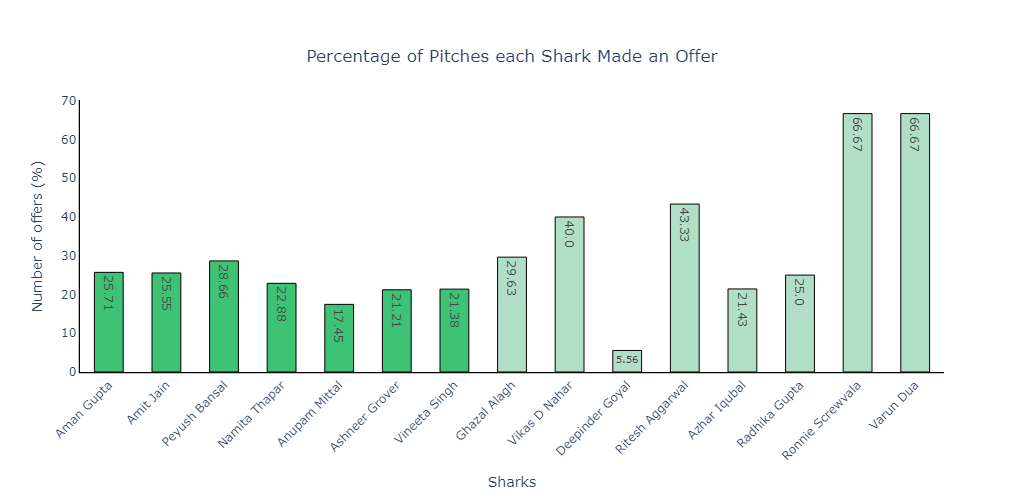

In [42]:
# Plotting the "Percentage of Pitches Each Shark Made an Offer"

colors = ['#3ec276'] * len(shark_labels) + ['#b1dfc6'] * len(guest_labels)

fig = go.Figure(data=[go.Bar(
    x=shark_labels + guest_labels,
    y=shark_values + guest_values,
    textposition='auto',
    width=0.5,
    text=shark_values + guest_values,
    marker_color=colors,
    marker_line_color='black',
    marker_line_width=1,
    opacity=1
)])

fig.update_layout(
    title={
        'text': 'Percentage of Pitches each Shark Made an Offer',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    width=1000,
    height=500,
    xaxis_title='Sharks',
    yaxis_title='Number of offers (%)',
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    xaxis=dict(
        showline=True,
        linewidth=1.25,
        linecolor='black'
    ),
    yaxis=dict(
        showline=True,
        linewidth=1.25,
        linecolor='black'
    ),
)

fig.show()

####  How does the average gross margin and net margin vary across industries?

In [43]:
# Gross margin / Net margin by 'Net margin'

gross_net_result = tank_df[[
    'industry', 'net_margin', 'gross_margin'
]].groupby('industry').mean().round(2).rename(
    columns = {
        "net_margin": "Net Margin",
        "gross_margin": "Gross Margin"
    }
).sort_values('Net Margin', ascending=False)

gross_net_result

,Net Margin,Gross Margin
industry,,
Sports,8.50,8.00
Beverages,6.67,30.20
Household,5.80,22.40
Fashion,4.36,21.42
Food,3.46,16.01
Pet,3.33,14.17
Manufacturing,3.14,14.08
Others,2.67,6.67
Services,1.87,12.05


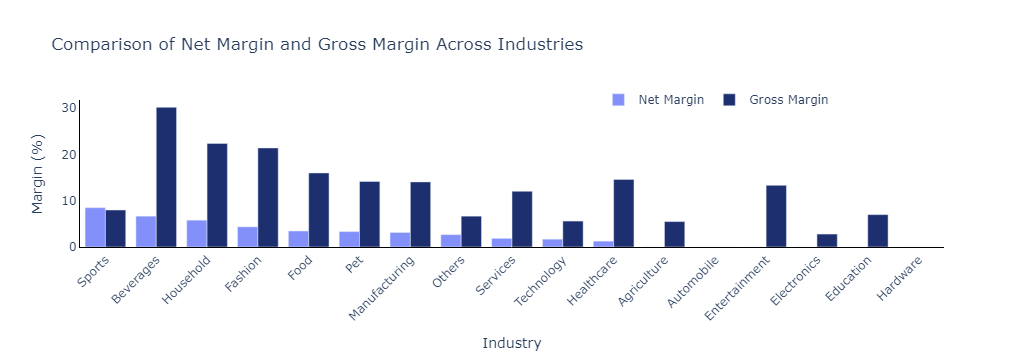

In [44]:
data = {
    'Industry': gross_net_result.index,
    'Net Margin': gross_net_result['Net Margin'].tolist(),
    'Gross Margin': gross_net_result['Gross Margin'].tolist()
}

df = pd.DataFrame(data)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['Industry'],
    y=df['Net Margin'],
    name='Net Margin',
    marker_color='#8390fa',
))

fig.add_trace(go.Bar(
    x=df['Industry'],
    y=df['Gross Margin'],
    name='Gross Margin',
    marker_color='#1d2f6f',
))

fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45, 
    title='Comparison of Net Margin and Gross Margin Across Industries',
    plot_bgcolor='white', 
    paper_bgcolor='white',
    xaxis=dict(
        title='Industry',
        showline=True,
        linewidth=1,
        linecolor='black',
        tickfont=dict(size=12),
        autorange=True
    ),
    yaxis=dict(
        title='Margin (%)',
        showline=True,
        linewidth=1,
        linecolor='black',
        autorange=True
    ),
    legend=dict(
        x=0.6,
        y=1.1,
        orientation='h'
    )
)

fig.show()

#### What is the distribution of startup founding years, and how does it relate to the success of securing investments?

In [45]:
total_startups = tank_df[
    ['year_founded', 'startup_name']
].groupby('year_founded').count().rename(
    columns = {
        "startup_name": "Total Startups"
    }
)

startups_got_offer = tank_df.loc[
    (tank_df['received_offer'] == 1),
    ['year_founded', 'startup_name']
].groupby('year_founded').count().rename(
    columns = {
        "startup_name": "Got offer"
    }
)

startups_founded_result = pd.merge(
    total_startups, startups_got_offer, 
    on="year_founded", how="left"
).fillna(0)

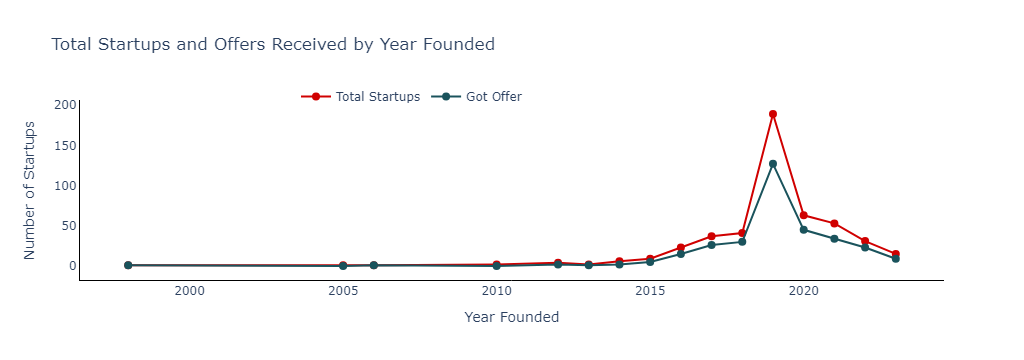

In [46]:
# Plot startups that got offer by year

data = {
    'year_founded': startups_founded_result.index.astype(int).tolist(),
    'Total Startups': startups_founded_result['Total Startups'].tolist(),
    'Got offer': startups_founded_result['Got offer'].tolist()
}
df = pd.DataFrame(data)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['year_founded'],
    y=df['Total Startups'],
    mode='lines+markers',
    name='Total Startups',
    marker=dict(color='#d00000', size=8),
    line=dict(color='#d00000', width=2)
))

fig.add_trace(go.Scatter(
    x=df['year_founded'],
    y=df['Got offer'],
    mode='lines+markers',
    name='Got Offer',
    marker=dict(color='#1a535c', size=8),
    line=dict(color='#1a535c', width=2)
))

fig.update_layout(
    title='Total Startups and Offers Received by Year Founded',
    xaxis_title='Year Founded',
    yaxis_title='Number of Startups',
    plot_bgcolor='white', 
    paper_bgcolor='white',
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
        tickfont=dict(size=12),
        autorange=True
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
        autorange=True
    ),
    legend=dict(
        x=0.25,
        y=1.1,
        orientation='h'
    )
)

fig.show()

In [59]:
# Conclusion!

print("""Conclusion: 

A statrup founded around 2019 is more likely to get an offer""")

Conclusion: 

A statrup founded around 2019 is more likely to get an offer


#### How does the average age of presenters impact the likelihood of receiving an investment?

In [47]:
total_startups_age = tank_df[['startup_name', 'pitchers_avg_age']].groupby('pitchers_avg_age').count().rename(
    columns = {
        "startup_name": "Total Startups"
    }
)

startups_got_offer_age = tank_df[['startup_name', 'pitchers_avg_age']].loc[
    tank_df['received_offer'] == 1
].groupby('pitchers_avg_age').count().rename(
    columns = {
        "startup_name": "Got offer"
    }
)

result_age = pd.merge(total_startups_age, startups_got_offer_age, on="pitchers_avg_age", how="left")
result_age['Offer (%)'] = ((result_age['Got offer'] / result_age['Total Startups']) * 100).round(2)

result_age

,Total Startups,Got offer,Offer (%)
pitchers_avg_age,,,
Middle,357,228,63.87
Old,3,2,66.67
Young,118,91,77.12


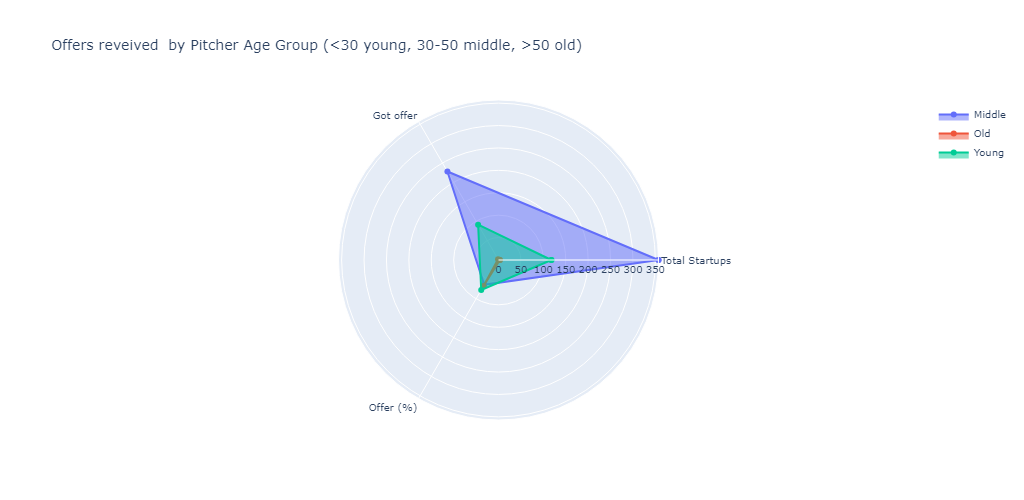

In [48]:
data = {
    'pitchers_avg_age': result_age.index.tolist(),
    'Total Startups': result_age['Total Startups'].tolist(),
    'Got offer': result_age['Got offer'].tolist(),
    'Offer (%)': result_age['Offer (%)'].tolist()
}
df = pd.DataFrame(data)

categories = ['Total Startups', 'Got offer', 'Offer (%)']
fig = go.Figure()

for index, row in df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories].tolist() + [row[categories].tolist()[0]],
        theta=categories + [categories[0]],
        fill='toself',
        name=row['pitchers_avg_age']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(df[categories].max())])
    ),
    title='Offers reveived  by Pitcher Age Group (<30 young, 30-50 middle, >50 old)',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=600,  
    height=500,
    font_size=10
)

fig.show()

In [63]:
# Conclusion!

print("""Conclusion: 

Pitchers with age of 30-50 are more likely to get an offer""")

Conclusion: 

Pitchers with age of 30-50 are more likely to get an offer


#### How does the presence of guest investors impact the investment outcomes for startups?

In [49]:
guest_offer_given = tank_df.loc[
    (tank_df['guest_present'] == 1) &
    (tank_df['received_offer'] == 1)
].shape[0]

guest_total_offer = tank_df.loc[
    (tank_df['guest_present'] == 1)
].shape[0]

no_guest_offer_given = tank_df.loc[
    (tank_df['guest_present'] == 0) &
    (tank_df['received_offer'] == 1)
].shape[0]

no_guest_total_offer = tank_df.loc[
    (tank_df['guest_present'] == 0)
].shape[0]

no_guest_percentage = np.round(((no_guest_offer_given / no_guest_total_offer) * 100), decimals=2)
guest_percentage = np.round(((guest_offer_given / guest_total_offer) * 100), decimals=2)

print(f'Share of pitches that got offer when NO GUEST shark is present: {no_guest_percentage}%')
print(f'Share of pitches that got offer when GUEST shark is present: {guest_percentage}%')

print(
"""
Conclusion: 

A startup is more likely to get an offer when there is NO GUEST Shark present in the pitch, 
However it does not makes much of a difference""")

Share of pitches that got offer when NO GUEST shark is present: 67.07%
Share of pitches that got offer when GUEST shark is present: 64.17%

Conclusion: 

A startup is more likely to get an offer when there is NO GUEST Shark present in the pitch, 
However it does not makes much of a difference


####  Is there a correlation between a  startup having a patent has and its likelihood of receiving an investment?

In [50]:
total_patent_offer = tank_df.loc[
    (tank_df['patents'] == 1)
].shape[0]

patents_got_offer = tank_df.loc[
    (tank_df['patents'] == 1) &
    (tank_df['received_offer'] == 1)
].shape[0]

total_non_patent_offer = tank_df.loc[
    (tank_df['patents'] == 0)
].shape[0]

non_patents_got_offer = tank_df.loc[
    (tank_df['patents'] == 0) &
    (tank_df['received_offer'] == 1)
].shape[0]

patent_offers = np.round(((patents_got_offer / total_patent_offer) * 100), decimals=2)
no_patent_offers = np.round(((non_patents_got_offer / total_non_patent_offer) * 100), decimals=2)

print(f'Share of Startups that got offer having NO PATENTS: {no_patent_offers}%')
print(f'Share of Startups that got offer having PATENTS: {patent_offers}%')

print(
"""
Conclusion: 

Startups with patents do not have a significantly higher chance of receiving offers \nWhen compared to those without patents"""
)

Share of Startups that got offer having NO PATENTS: 67.13%
Share of Startups that got offer having PATENTS: 67.44%

Conclusion: 

Startups with patents do not have a significantly higher chance of receiving offers 
When compared to those without patents


####  Are there any significant differences in investment patterns between male and female presenters and presenter count?

In [51]:
presenter_count_offer = tank_df.loc[
    (tank_df['received_offer'] == 1),
    ['presenter_count', 'startup_name']
].groupby('presenter_count').count().rename(
    columns = {
        "startup_name": "Startups Got Offer"
    }
)

print(
    """Conclusion: 

Chances of getting an offer gets better if there are 1, 2 or max 3 presenters"""
)

Conclusion: 

Chances of getting an offer gets better if there are 1, 2 or max 3 presenters


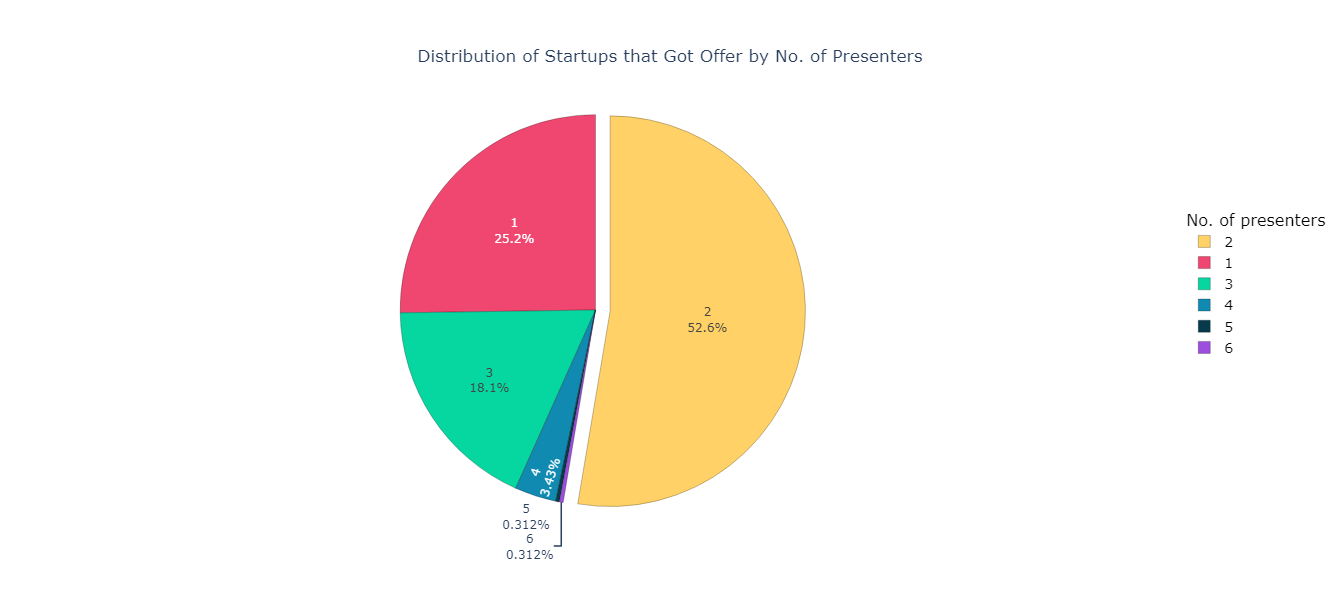

In [52]:
fig = go.Figure(data=[go.Pie(
    labels=presenter_count_offer.index.tolist(),
    values=presenter_count_offer['Startups Got Offer'].tolist(),
    pull=[0, 0.075, 0, 0, 0, 0],
    marker=dict(
        colors=['#ef476f', '#ffd166', '#06d6a0', '#118ab2', '#073b4c', '#9d4edd'], 
        line=dict(color='black', width=0.25)
    ),
    textinfo='label+percent',
    hoverinfo='label+percent+value'
)])

fig.update_layout(
    title={
        'text': 'Distribution of Startups that Got Offer by No. of Presenters',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        title='No. of presenters',
        title_font_size=16,
        x=1.25, 
        y=0.75,  
        traceorder='normal',
        orientation='v', 
        bgcolor='rgba(255, 255, 255, 0.8)', 
        bordercolor='black',
        borderwidth=0.0,
        font=dict(
            size=14, 
            color="black" 
        )
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=600,
    height=600
)

fig.show()

In [53]:
total_pitches = tank_df.shape[0]

male_presenter_offer = tank_df.loc[
    (tank_df['male_presenter'] > 0) &
    (tank_df['female_presenters'] == 0) &
    (tank_df['received_offer'] == 1)
].shape[0]

female_presenter_offer = tank_df.loc[
    (tank_df['female_presenters'] > 0) &
    (tank_df['male_presenter'] == 0) &
    (tank_df['received_offer'] == 1)
].shape[0]

male_female_presenter_offer = tank_df.loc[
    (tank_df['female_presenters'] > 0) &
    (tank_df['male_presenter'] > 0) &
    (tank_df['received_offer'] == 1)
].shape[0]

male_offer_percentage = np.round(((male_presenter_offer / total_pitches) * 100), decimals=2)
female_offer_percentage = np.round(((female_presenter_offer / total_pitches) * 100), decimals=2)
male_female_offer_percentage = np.round(((male_female_presenter_offer / total_pitches) * 100), decimals=2)

print(
    f"""Pitches that got offer with MALE presenters only: {male_offer_percentage}%
Pitches that got offer with FEMALE presenters only: {female_offer_percentage}%
Pitches that got offer with MALE & FEMALE presenters: {male_female_offer_percentage}%

Conclusion:

Pitches with MALE presenters only are more likely to get offers"""
)

Pitches that got offer with MALE presenters only: 34.1%
Pitches that got offer with FEMALE presenters only: 10.25%
Pitches that got offer with MALE & FEMALE presenters: 22.8%

Conclusion:

Pitches with MALE presenters only are more likely to get offers


#### How do the valuations requested by startups compare to the actual deal valuations?

In [54]:
valuation_estimation = tank_df.loc[
    (tank_df['received_offer'] == 1),
    ['startup_name', 'valueation_requested', 'deal_valuation']
]

valuation_estimation['valueation_requested'] = valuation_estimation['valueation_requested'].round(2)

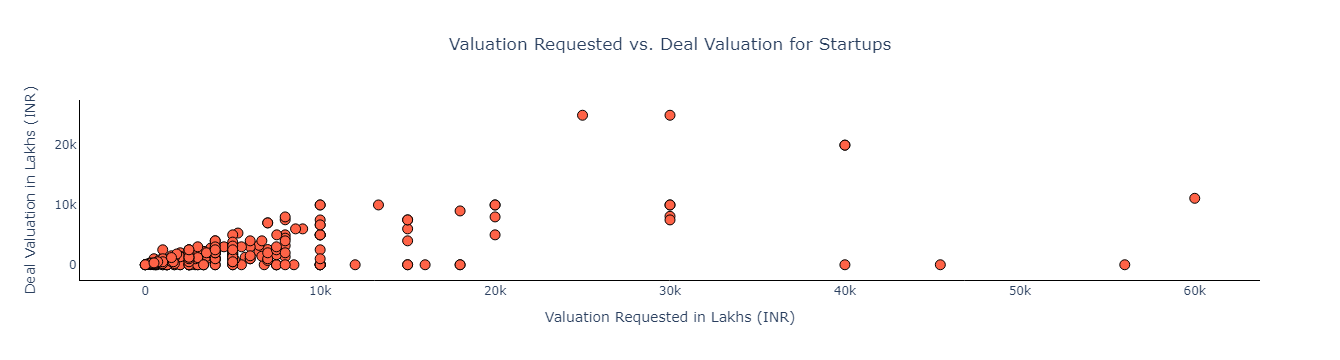

In [55]:
# Plot for Valuation requested vs Deal valuationabs

data = {
    'startup_name': valuation_estimation['startup_name'],
    'valueation_requested': valuation_estimation['valueation_requested'],
    'deal_valuation': valuation_estimation['deal_valuation']
}

df = pd.DataFrame(data)

fig = px.scatter(
    df,
    x='valueation_requested',
    y='deal_valuation',
    labels={
        'valueation_requested': 'Valuation Requested (in Lakhs)',
        'deal_valuation': 'Deal Valuation (in Lakhs)'
    },
    title='Scatter Plot of Valuation Requested vs. Deal Valuation',
    hover_data=['startup_name']
)

fig.update_traces(
    marker=dict(
        size=10, 
        color='rgb(255, 99, 71)',
        line=dict(width=1, color='black') 
    )
)
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title={
        'text': 'Valuation Requested vs. Deal Valuation for Startups',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
        title='Valuation Requested in Lakhs (INR)',
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
        title='Deal Valuation in Lakhs (INR)',
    )
)

fig.show()

#### Which sharks are most likely to invest in a startup, and what are their preferred industries?

In [56]:
# Deducing shark investments

def shark_investments(name):
    industries = tank_df.loc[
        tank_df[f'{name}_investment_amount'] > 0,
        ['industry', 'startup_name']
    ].groupby('industry').count().sort_values(
        'startup_name', ascending=False
    ).head(5).index.tolist()
    
    invest_count = tank_df.loc[
        tank_df[f'{name}_investment_amount'] > 0,
        ['industry', 'startup_name']
    ].groupby('industry').count().sort_values(
        'startup_name', ascending=False
    ).head(5).values.ravel().tolist()

    return industries, invest_count

In [57]:
anupam_industires, anupam_count = shark_investments('anupam')
namita_industires, namita_count = shark_investments('namita')
vineeta_industires, vineeta_count = shark_investments('vineeta')
peyush_industires, peyush_count = shark_investments('peyush')
aman_industires, aman_count = shark_investments('aman')
amit_industires, amit_count = shark_investments('amit')
ashneer_industires, ashneer_count = shark_investments('ashneer')

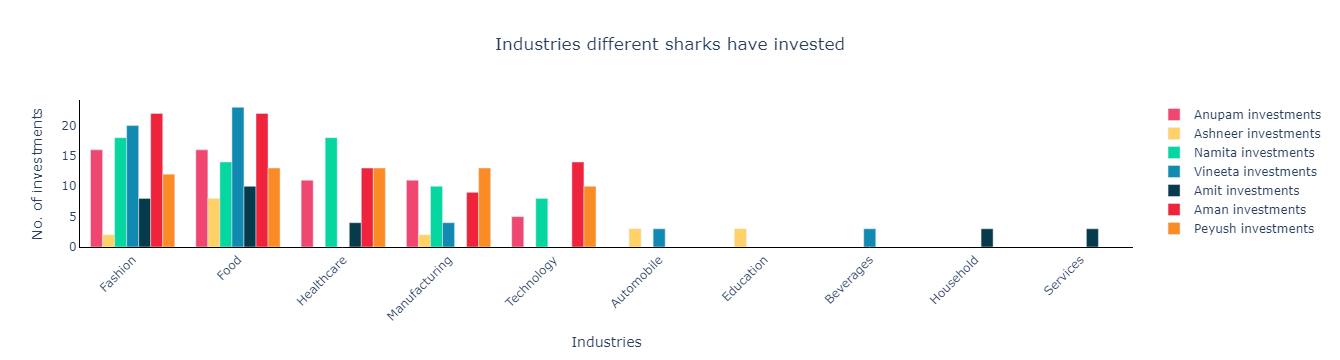

In [58]:
# Plot different investments by different sharks!

fig = go.Figure()
fig.add_trace(go.Bar(
    x=anupam_industires,
    y=anupam_count,
    name='Anupam investments',
    marker_color='#ef476f'
))
fig.add_trace(go.Bar(
    x=ashneer_industires,
    y=ashneer_count,
    name='Ashneer investments',
    marker_color='#ffd166'
))
fig.add_trace(go.Bar(
    x=namita_industires,
    y=namita_count,
    name='Namita investments',
    marker_color='#06d6a0'
))
fig.add_trace(go.Bar(
    x=vineeta_industires,
    y=vineeta_count,
    name='Vineeta investments',
    marker_color='#118ab2'
))
fig.add_trace(go.Bar(
    x=amit_industires,
    y=amit_count,
    name='Amit investments',
    marker_color='#073b4c'
))
fig.add_trace(go.Bar(
    x=aman_industires,
    y=aman_count,
    name='Aman investments',
    marker_color='#ef233c'
))
fig.add_trace(go.Bar(
    x=peyush_industires,
    y=peyush_count,
    name='Peyush investments',
    marker_color='#fb8b24'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title={
        'text': 'Industries different sharks have invested',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
        title='Industries',
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
        title='No. of investments',
    )
)
fig.show()